In [89]:
# KNN Classification
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings


In [90]:
animal = pd.read_csv(r"C:\Users\SHIVA KUMAR\Desktop\Assigmnt\KNN\Zoo.csv")

In [91]:
animal.shape

(101, 18)

In [92]:
animal.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [93]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# EDA

In [94]:
animal["type"].nunique()

7

In [95]:
animal["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [96]:
animal.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [97]:
animal[animal.duplicated()].shape

(0, 18)

Text(0.5, 1.0, 'Boxplots')

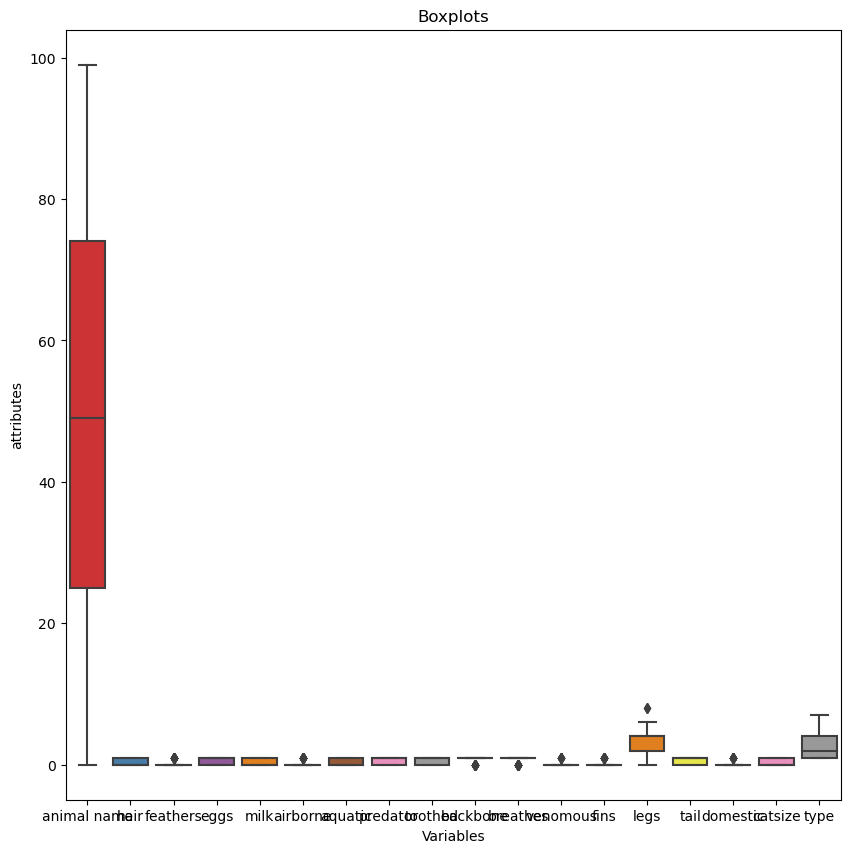

In [136]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=animal, orient='v', palette='Set1')
plt.xlabel('Variables')
plt.ylabel('attributes')
plt.title('Boxplots')

array([[<Axes: title={'center': 'animal name'}>,
        <Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>],
       [<Axes: title={'center': 'milk'}>,
        <Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>],
       [<Axes: title={'center': 'toothed'}>,
        <Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>],
       [<Axes: title={'center': 'fins'}>,
        <Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>],
       [<Axes: title={'center': 'catsize'}>,
        <Axes: title={'center': 'type'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1400x600 with 0 Axes>

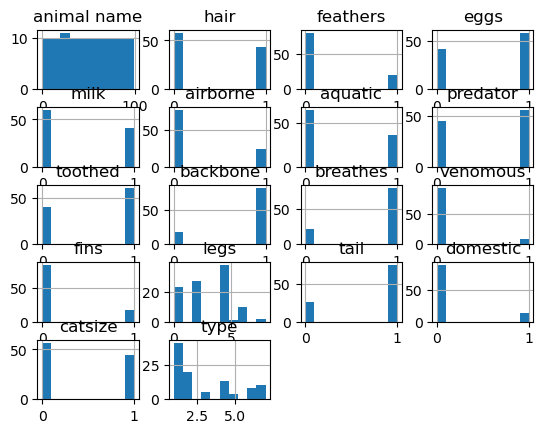

In [138]:
plt.figure(figsize=(14, 6))
animal.hist()

In [98]:
zu=animal['animal name'].astype('category')
zu.unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']>

In [99]:
#ignore harmless warnings
import warnings 
warnings.filterwarnings('ignore')
animal.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [100]:
import pandas as pd

# Perform label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
animal["animal name"] = LE.fit_transform(animal["animal name"])

In [101]:
animal["animal name"].head()

0    0
1    1
2    2
3    3
4    4
Name: animal name, dtype: int32

In [102]:
animal.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [103]:
Y = animal['type']
X = animal.iloc[:,0:17]

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=24)

In [105]:
X_train.corr()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal name,1.000000,-0.138602,0.067630,0.130057,-0.142400,0.000988,0.020642,6.622155e-03,-0.137000,-0.036064,0.080859,0.141891,-0.024203,-0.146665,1.404843e-01,-0.209245,-0.017657
hair,-0.138602,1.000000,-0.417407,-0.827303,0.884868,-0.269569,-0.527364,-1.720618e-01,0.435941,0.149366,0.479234,-0.102367,-0.362927,0.496311,-4.301545e-02,0.211172,0.485249
feathers,0.067630,-0.417407,1.000000,0.417407,-0.417407,0.686233,0.042586,-1.516196e-01,-0.671871,0.163390,0.237542,-0.111979,-0.247594,-0.146028,2.274294e-01,-0.044251,-0.214521
eggs,0.130057,-0.827303,0.417407,1.000000,-0.942434,0.409346,0.408665,5.735393e-02,-0.621261,-0.329634,-0.409346,0.102367,0.226342,-0.261965,-1.003694e-01,-0.121038,-0.542626
milk,-0.142400,0.884868,-0.417407,-0.942434,1.000000,-0.409346,-0.408665,-5.735393e-02,0.559488,0.329634,0.479234,-0.225913,-0.226342,0.320552,1.003694e-01,0.121038,0.600003
airborne,0.000988,-0.269569,0.686233,0.409346,-0.409346,1.000000,-0.041174,-2.437087e-01,-0.696393,-0.250122,0.272727,0.021427,-0.284268,0.116852,-8.703883e-02,0.031265,-0.368200
aquatic,0.020642,-0.527364,0.042586,0.408665,-0.408665,-0.041174,1.000000,4.139187e-01,0.010918,0.090272,-0.679366,0.065507,0.708113,-0.548795,8.869686e-02,-0.183200,-0.155494
predator,0.006622,-0.172062,-0.151620,0.057354,-0.057354,-0.243709,0.413919,1.000000e+00,0.184637,0.089803,-0.243709,0.123091,0.272166,-0.175113,-6.046750e-17,-0.359211,0.114332
toothed,-0.137000,0.435941,-0.671871,-0.621261,0.559488,-0.696393,0.010918,1.846372e-01,1.000000,0.530589,-0.203561,0.034091,0.368514,-0.254168,2.769559e-01,0.049743,0.350074
backbone,-0.036064,0.149366,0.163390,-0.329634,0.329634,-0.250122,0.090272,8.980265e-02,0.530589,1.000000,0.031265,-0.105012,0.195529,-0.480940,7.184212e-01,-0.012097,0.349090


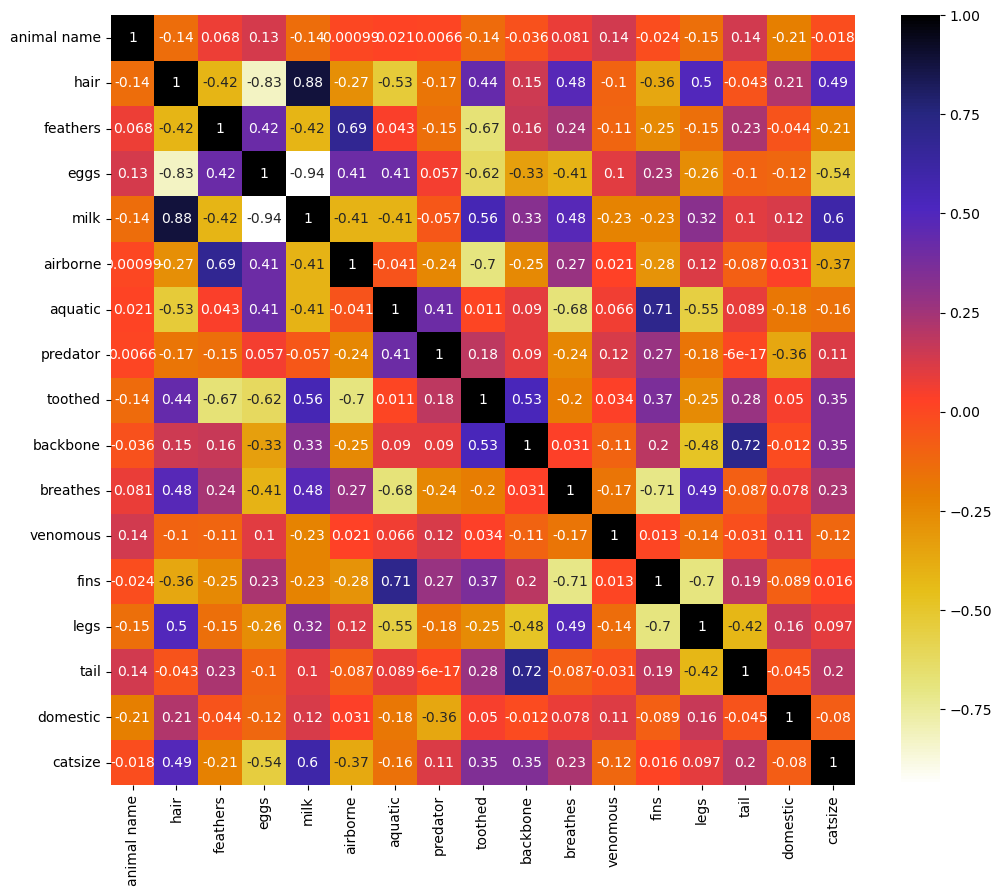

In [106]:
#using Pearson Correlation
plt.figure(figsize=(12,10))
Cor = X_train.corr()
sns.heatmap(Cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [139]:
#with the following fuction we can select highly correlated features
# it will remove  the first that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set () # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  abs(corr_matrix.iloc[i, j]) > threshold: # abs will handle -ve correlated if you want  #we intrested absolute coff value
                colname  = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [140]:
corr_features = correlation(X_train, 0.85) # 0.8 is the threshold value that could be any 70%, 80%
len(set(corr_features))

1

In [141]:
corr_features # so "ca" is the not much impact for other columns if you remove

{'milk'}

# model building

In [147]:
Y = animal['type']
X = animal.iloc[:,1:17]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [148]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [149]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.3,random_state=45)


In [150]:
X_train.shape,X_test.shape

((70, 16), (31, 16))

In [151]:
animal.shape

(101, 18)

In [152]:
#Data Partition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.986
0.935


In [153]:
# validation set method --> validaton hold-off method
knn = KNeighborsClassifier(n_neighbors=1)

training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y.values.ravel(), test_size=0.30, random_state=i)
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


Average trianing accuray 1.0
Average test accuray 0.96


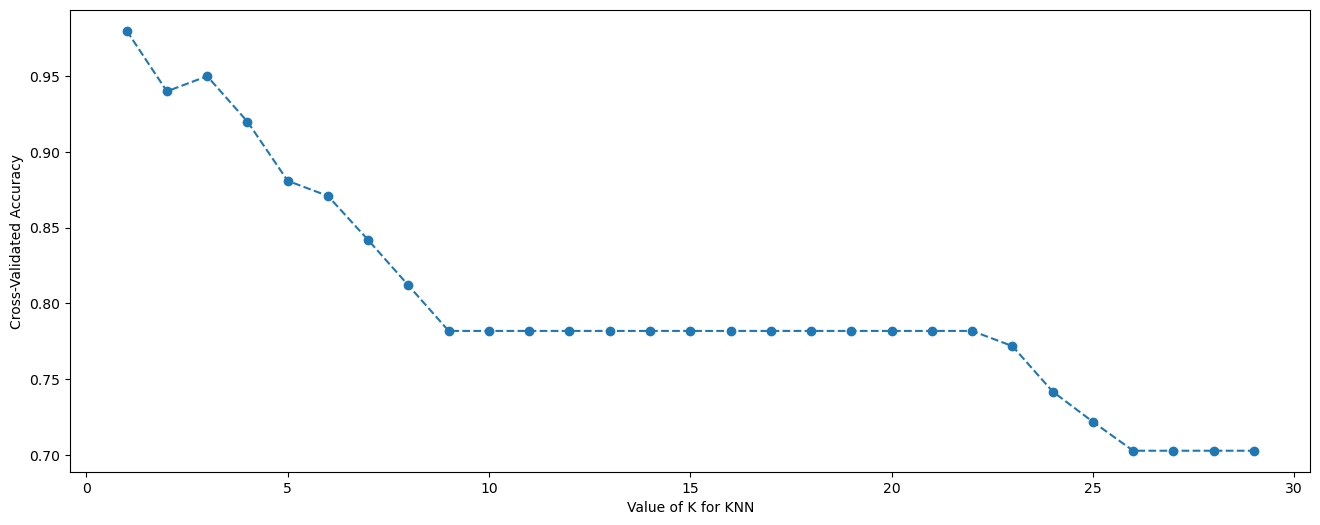

In [154]:
#Visualizing the CRoss Validation results
k_range = range(1, 30)
k_scores = []

from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X, Y.values.ravel(), cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores,linestyle='dashed',marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [155]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,30),
                            'Accuracy' : k_scores})
zoo_accuracy.sort_values('Accuracy', ascending = False)
zoo_accuracy

,Value of k,Accuracy
0,1,0.980000
1,2,0.940000
2,3,0.950000
3,4,0.920000
4,5,0.880909
5,6,0.870909
6,7,0.841818
7,8,0.811818
8,9,0.781818
9,10,0.781818


In [156]:
model2 = KNeighborsClassifier(n_neighbors = 17)
model2.fit(X,Y)


KNeighborsClassifier(n_neighbors=17)

In [157]:
kfold2 = KFold(n_splits=12)
results2 = cross_val_score(model2, X, Y, cv = kfold2)

In [158]:
results2

array([1.        , 0.66666667, 0.66666667, 1.        , 0.66666667,
       0.75      , 0.875     , 0.75      , 0.625     , 0.625     ,
       0.5       , 0.875     ])

# Grid Search for Algorithm Tuning


In [159]:
n_neighbors2 = list(range(1,40))
parameters2 = {'n_neighbors' : n_neighbors2}

In [160]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator = model2, param_grid = parameters2)
grid2.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [161]:
print(grid2.best_score_)
print(grid2.best_params_)

0.97
{'n_neighbors': 1}


# Visualizing the CV results

In [162]:
k_range = range(1,35)
k_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

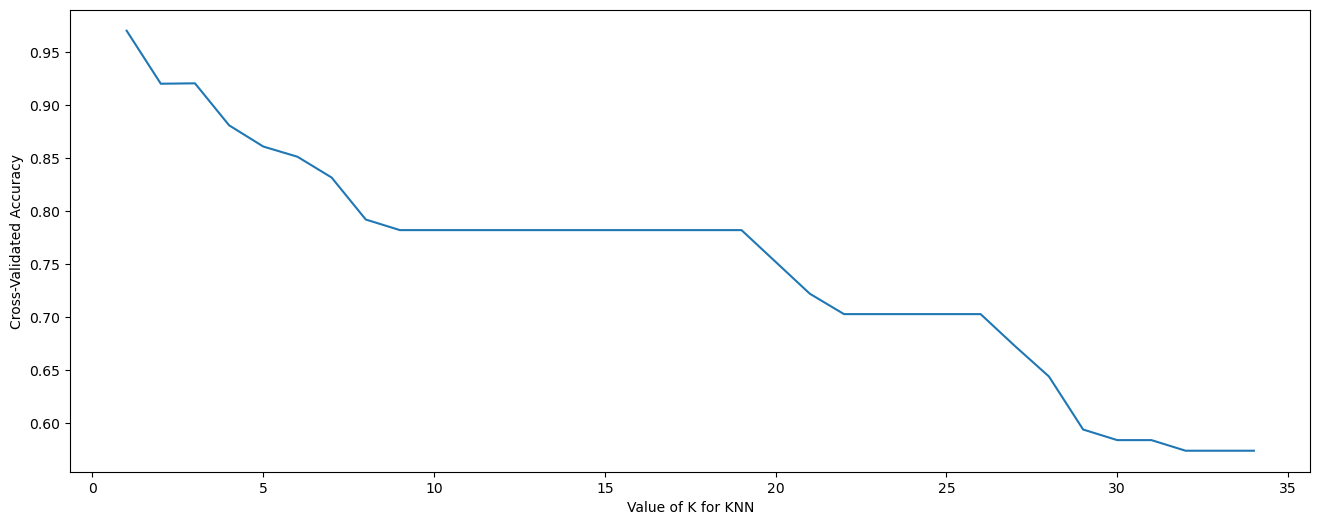

In [163]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [164]:
k_scores


[0.9703846153846154,
 0.9203846153846154,
 0.9207692307692308,
 0.8811538461538461,
 0.861153846153846,
 0.8515384615384615,
 0.831923076923077,
 0.7923076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7523076923076923,
 0.7223076923076924,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.6730769230769231,
 0.6442307692307693,
 0.5942307692307692,
 0.5842307692307692,
 0.5842307692307692,
 0.5742307692307692,
 0.5742307692307692,
 0.5742307692307692]

In [165]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,35),
                            'Accuracy' : k_scores})
zoo_accuracy

,Value of k,Accuracy
0,1,0.970385
1,2,0.920385
2,3,0.920769
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
8,9,0.782308
9,10,0.782308


In [166]:
zoo_accuracy.sort_values('Accuracy', ascending = False)


,Value of k,Accuracy
0,1,0.970385
2,3,0.920769
1,2,0.920385
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
13,14,0.782308
18,19,0.782308
